In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [276]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [277]:
train2=pd.read_csv('train.csv')
test2=pd.read_csv('test.csv')

<h3>Feature engineering

In [278]:
train2.head(3).append(train2.tail(3))


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,2019-08-13,0,0,0,22.711
5427,ac6579972e89dfc78d3ee95d15764681,913,NaN,Unknown - MobileWeb,2019-06-18,0,0,0,20.844
5428,bd8f8239b827fc29d4e1bec91bd499b7,1254,Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_4 like ...,iPhone - Web,2019-10-21,0,0,0,20.504


In [279]:
print(train.shape,test.shape)

(5429, 9) (2327, 8)


In [280]:
print({'session_id':train['session_id'].nunique()},{'session_number':train['session_number'].nunique()},{'clent_agent':train['client_agent'].nunique()},{'device_details':train['device_details'].nunique()},{'date':train['date'].nunique()})

{'session_id': 5429} {'session_number': 610} {'clent_agent': 698} {'device_details': 17} {'date': 342}


<h4>Drop session_id as, it is a constant feature

<h3> here we are having client agent and device details as categorical features, now check whether there are any categories that are present in test but not in train 

In [281]:
extra=[None]*train['client_agent'].nunique()
train['client_agent']=train['client_agent'].str.lower()
test['client_agent']=train['client_agent'].str.lower()

In [282]:
client_unique=train['client_agent'].unique()
test_client_unique=test['client_agent'].unique()

In [283]:
print(len(client_unique))
print(len(test_client_unique))

699
505


In [284]:
k=0
for i in range(len(test_client_unique)):
    for j in range(len(client_unique)):
        if test_client_unique[i]==client_unique[j]:
            extra[i]=test_client_unique[i]

In [285]:
extra2=pd.DataFrame({'extra':extra})

In [286]:
extra2['extra'].nunique()

504

so we are having some extra categories in test data where as they are not in train data

so here we can use laplace smoothing or additive smoothing 

In [287]:
train.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [288]:
train['client_agent'].fillna('unknown',inplace=True)

In [289]:
train['client_lenghts']=[None]*len(train['client_agent'])
for i in range(len(train['client_agent'])):
    train['client_lenghts'][i]=len(train['client_agent'][i])

In [290]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,client_lenghts
0,57f879e70d3c5fc2a98102d64c9fd84e,715,mozilla/5.0 (windows nt 6.1; wow64) applewebki...,Desktop - Chrome,2020-01-22,1,0,0,236.886,109
1,a5442b0c7c33d0a811e7661e556b2de8,55,product/8.0 iphone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,24
2,305cb1486ed8610c00b37007926cb2c4,11,mozilla/5.0 (iphone; cpu iphone os 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,255
3,f2c1ecc9993f0071df91ba178450498c,2794,mozilla/5.0 (compatible; msie 9.0; windows nt ...,Desktop - IE,2019-12-30,0,1,0,455.201,70
4,e460830ae295e55d2216ebdc761ab9a6,3674,mozilla/5.0 (iphone; cpu iphone os 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,110


In [291]:
k=1
N=len(train)
train['clinet_Frecuency']=train['client_agent'].map(train['client_agent'].value_counts())
#encode_value=(xi+k)/(N+k*d)#xi=frequency of xi,k=konstant,N=lenght of dataset,d=lenght of xi

In [292]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,client_lenghts,clinet_Frecuency
0,57f879e70d3c5fc2a98102d64c9fd84e,715,mozilla/5.0 (windows nt 6.1; wow64) applewebki...,Desktop - Chrome,2020-01-22,1,0,0,236.886,109,11
1,a5442b0c7c33d0a811e7661e556b2de8,55,product/8.0 iphone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,24,27
2,305cb1486ed8610c00b37007926cb2c4,11,mozilla/5.0 (iphone; cpu iphone os 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,255,1
3,f2c1ecc9993f0071df91ba178450498c,2794,mozilla/5.0 (compatible; msie 9.0; windows nt ...,Desktop - IE,2019-12-30,0,1,0,455.201,70,68
4,e460830ae295e55d2216ebdc761ab9a6,3674,mozilla/5.0 (iphone; cpu iphone os 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,110,209


In [293]:
train['client_encode']=[None]*len(train['client_agent'])
for i in range(len(train['client_agent'])):
    train['client_encode'][i]=((train['clinet_Frecuency'][i])+k)/(N+k*train['client_lenghts'][i])

In [294]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,client_lenghts,clinet_Frecuency,client_encode
0,57f879e70d3c5fc2a98102d64c9fd84e,715,mozilla/5.0 (windows nt 6.1; wow64) applewebki...,Desktop - Chrome,2020-01-22,1,0,0,236.886,109,11,0.00216685
1,a5442b0c7c33d0a811e7661e556b2de8,55,product/8.0 iphone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,24,27,0.00513479
2,305cb1486ed8610c00b37007926cb2c4,11,mozilla/5.0 (iphone; cpu iphone os 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,255,1,0.000351865
3,f2c1ecc9993f0071df91ba178450498c,2794,mozilla/5.0 (compatible; msie 9.0; windows nt ...,Desktop - IE,2019-12-30,0,1,0,455.201,70,68,0.0125477
4,e460830ae295e55d2216ebdc761ab9a6,3674,mozilla/5.0 (iphone; cpu iphone os 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,110,209,0.037913


In [295]:
test.isnull().sum()

session_id         0
session_number     0
client_agent      63
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [296]:
test['client_agent'].fillna('unknown',inplace=True)

In [297]:
test['client_lenghts']=[None]*len(test['client_agent'])
for i in range(len(test['client_agent'])):
    test['client_lenghts'][i]=len(test['client_agent'][i])

In [298]:
k=1
N=len(train)
test['clinet_Frecuency']=test['client_agent'].map(test['client_agent'].value_counts())

In [299]:
test['client_encode']=[None]*len(test['client_agent'])
for i in range(len(test['client_agent'])):
    test['client_encode'][i]=((test['clinet_Frecuency'][i])+k)/(N+k*test['client_lenghts'][i])

In [300]:
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,client_lenghts,clinet_Frecuency,client_encode
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,mozilla/5.0 (windows nt 6.1; wow64) applewebki...,Desktop - IE,2020-01-07,1,0,0,109,2,0.000541712
1,6bc696d99954e4f1367e845465186aef,935,product/8.0 iphone/8.1.3,Android Phone - Android,2020-02-13,0,0,0,24,7,0.00146708
2,3d8611a5ea0f621d205b67f09f663a89,902,mozilla/5.0 (iphone; cpu iphone os 7_1_2 like ...,iPhone - iOS,2019-10-14,1,0,0,255,1,0.000351865
3,a0351545c032fd0da36289410c6c3354,3223,mozilla/5.0 (compatible; msie 9.0; windows nt ...,Desktop - IE,2020-01-26,0,0,0,70,25,0.00472813
4,dd8999772b0ab27225fb05e5df2f1da6,231,mozilla/5.0 (iphone; cpu iphone os 7_1_1 like ...,Desktop - Chrome,2020-01-29,0,0,0,110,86,0.0157068


In [301]:
train.drop(['session_id','client_agent'],axis=1,inplace=True)
test.drop(['session_id','client_agent'],axis=1,inplace=True)

In [302]:
train.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out,time_spent,client_lenghts,clinet_Frecuency,client_encode
0,715,Desktop - Chrome,2020-01-22,1,0,0,236.886,109,11,0.00216685
1,55,iPhone - iOS,2020-02-27,1,0,0,1277.455,24,27,0.00513479
2,11,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,255,1,0.000351865
3,2794,Desktop - IE,2019-12-30,0,1,0,455.201,70,68,0.0125477
4,3674,iPhone - Web,2019-09-10,0,0,0,1164.877,110,209,0.037913


In [303]:
train['client_encode']=train['client_encode'].astype('float64')

In [304]:
train.dtypes

session_number        int64
device_details       object
date                 object
purchased             int64
added_in_cart         int64
checked_out           int64
time_spent          float64
client_lenghts       object
clinet_Frecuency      int64
client_encode       float64
dtype: object

In [305]:
train['ca_isna'] = np.where(train2['client_agent'].isnull(), 1, 0)

In [306]:
train.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out,time_spent,client_lenghts,clinet_Frecuency,client_encode,ca_isna
0,715,Desktop - Chrome,2020-01-22,1,0,0,236.886,109,11,0.002167,0
1,55,iPhone - iOS,2020-02-27,1,0,0,1277.455,24,27,0.005135,0
2,11,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,255,1,0.000352,0
3,2794,Desktop - IE,2019-12-30,0,1,0,455.201,70,68,0.012548,0
4,3674,iPhone - Web,2019-09-10,0,0,0,1164.877,110,209,0.037913,0


In [307]:
test['ca_isna'] = np.where(test2['client_agent'].isnull(), 1, 0)

In [308]:
print(train.shape,test.shape)

(5429, 11) (2327, 10)


In [309]:
train['device_details'].unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [310]:
device={'Desktop - Chrome':0, 'iPhone - iOS':1, 'iPhone - MobileWeb':2,
       'Desktop - IE':3, 'iPhone - Web':4, 'Android Phone - Android':5,
       'Desktop - Firefox':6, 'Android Tablet - Web':7, 'iPad - Web':8,
       'Other - Other':9, 'Desktop - Safari':10, 'Android Phone - Web':11,
       'iPad - iOS':12, 'Android Phone - MobileWeb':13, 'Unknown - MobileWeb':14,
       'Android Tablet - Android':15, 'Android Tablet - MobileWeb':16}

In [311]:
train['device_details']=train['device_details'].replace(device)
test['device_details']=test['device_details'].replace(device)

In [312]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['quarter'] = pd.to_datetime(train['date']).dt.quarter
train['weekofyear'] = pd.to_datetime(train['date']).dt.weekofyear
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
train['hour'] = pd.to_datetime(train['date']).dt.hour
train['minute'] = pd.to_datetime(train['date']).dt.minute
train['dayofyear'] = pd.to_datetime(train['date']).dt.dayofyear
train['dayofweek'] = pd.to_datetime(train['date']).dt.dayofweek
train['is_weekend'] = np.where(train['dayofweek'].isin([6, 0]), 1, 0)
train['season'] = ((train['month'] % 12 + 3) // 3)

In [313]:
train.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out,time_spent,client_lenghts,clinet_Frecuency,client_encode,...,quarter,weekofyear,month,day,hour,minute,dayofyear,dayofweek,is_weekend,season
0,715,0,2020-01-22,1,0,0,236.886,109,11,0.002167,...,1,4,1,22,0,0,22,2,0,1
1,55,1,2020-02-27,1,0,0,1277.455,24,27,0.005135,...,1,9,2,27,0,0,58,3,0,1
2,11,2,2019-08-01,0,0,0,21.704,255,1,0.000352,...,3,31,8,1,0,0,213,3,0,3
3,2794,3,2019-12-30,0,1,0,455.201,70,68,0.012548,...,4,1,12,30,0,0,364,0,1,1
4,3674,4,2019-09-10,0,0,0,1164.877,110,209,0.037913,...,3,37,9,10,0,0,253,1,0,4


In [314]:
test['year'] = pd.to_datetime(test['date']).dt.year
test['quarter'] = pd.to_datetime(test['date']).dt.quarter
test['weekofyear'] = pd.to_datetime(test['date']).dt.weekofyear
test['month'] = pd.to_datetime(test['date']).dt.month
test['day'] = pd.to_datetime(test['date']).dt.day
test['hour'] = pd.to_datetime(test['date']).dt.hour
test['minute'] = pd.to_datetime(test['date']).dt.minute
test['dayofyear'] = pd.to_datetime(test['date']).dt.dayofyear
test['dayofweek'] = pd.to_datetime(test['date']).dt.dayofweek
test['is_weekend'] = np.where(test['dayofweek'].isin([6, 0]), 1, 0)
test['season'] = ((test['month'] % 12 + 3) // 3)

In [315]:
train.drop(['date'],axis=1,inplace=True)
test.drop(['date'],axis=1,inplace=True)

In [316]:
test.head()

,session_number,device_details,purchased,added_in_cart,checked_out,client_lenghts,clinet_Frecuency,client_encode,ca_isna,year,quarter,weekofyear,month,day,hour,minute,dayofyear,dayofweek,is_weekend,season
0,99,3,1,0,0,109,2,0.000541712,0,2020,1,2,1,7,0,0,7,1,0,1
1,935,5,0,0,0,24,7,0.00146708,0,2020,1,7,2,13,0,0,44,3,0,1
2,902,1,1,0,0,255,1,0.000351865,0,2019,4,42,10,14,0,0,287,0,1,4
3,3223,3,0,0,0,70,25,0.00472813,0,2020,1,4,1,26,0,0,26,6,1,1
4,231,0,0,0,0,110,86,0.0157068,0,2020,1,5,1,29,0,0,29,2,0,1


In [317]:
print(train.shape,test.shape)

(5429, 21) (2327, 20)


In [318]:
test['client_encode']=test['client_encode'].astype('float64')

In [319]:
train['client_device_mean']=train.groupby(['device_details'])['client_encode'].transform('mean')
train['client_device_min']=train.groupby(['device_details'])['client_encode'].transform('min')
train['client_device_max']=train.groupby(['device_details'])['client_encode'].transform('max')
train['client_device_sum']=train.groupby(['device_details'])['client_encode'].transform('sum')

In [320]:
test['client_device_mean']=test.groupby(['device_details'])['client_encode'].transform('mean')
test['client_device_min']=test.groupby(['device_details'])['client_encode'].transform('min')
test['client_device_max']=test.groupby(['device_details'])['client_encode'].transform('max')
test['client_device_sum']=test.groupby(['device_details'])['client_encode'].transform('sum')

In [321]:
train['session_client_device_mean']=train.groupby(['device_details','session_number'])['client_encode'].transform('mean')
train['session_client_device_min']=train.groupby(['device_details','session_number'])['client_encode'].transform('min')
train['session_client_device_max']=train.groupby(['device_details','session_number'])['client_encode'].transform('max')
train['session_client_device_sum']=train.groupby(['device_details','session_number'])['client_encode'].transform('sum')
train['session_client_device_mean']=train.groupby(['device_details','session_number'])['client_encode'].transform('count')

In [322]:
test['session_client_device_mean']=test.groupby(['device_details','session_number'])['client_encode'].transform('mean')
test['session_client_device_min']=test.groupby(['device_details','session_number'])['client_encode'].transform('min')
test['session_client_device_max']=test.groupby(['device_details','session_number'])['client_encode'].transform('max')
test['session_client_device_sum']=test.groupby(['device_details','session_number'])['client_encode'].transform('sum')
test['session_client_device_mean']=test.groupby(['device_details','session_number'])['client_encode'].transform('count')

In [323]:
X=train.drop(['time_spent'],axis=1)
y=train['time_spent']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.2)

<h3>Feature selection

In [174]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(0)
selector.fit(xtrain)
print(selector.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True]


In [177]:
constant_columns=[column for column in xtrain.columns if column not in xtrain.columns[selector.get_support()]]
print(constant_columns)

['hour', 'minute']


In [178]:
xtrain.drop(constant_columns,axis=1,inplace=True)
xtest.drop(constant_columns,axis=1,inplace=True)
test.drop(constant_columns,axis=1,inplace=True)

<h3>Using pearson correlation

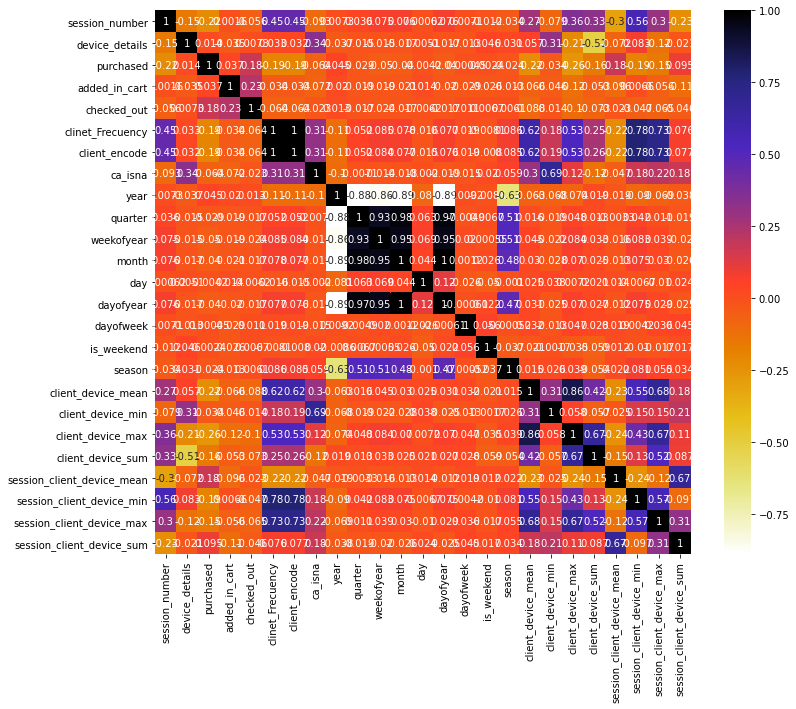

In [180]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = xtrain.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [181]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [183]:
cols=correlation(xtrain,0.9)
len(set(cols))

4

In [184]:
cols

{'client_encode', 'dayofyear', 'month', 'weekofyear'}

In [185]:
xtrain.drop(cols,axis=1,inplace=True)
xtest.drop(cols,axis=1,inplace=True)
test.drop(cols,axis=1,inplace=True)

In [188]:
from sklearn.feature_selection import chi2

In [196]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
n_feat = [8,10,12]
for n in n_feat:
    model = RandomForestRegressor()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    #print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.8626875917863612
['session_number' 'client_encode' 'day' 'dayofyear' 'dayofweek'
 'client_device_sum' 'session_client_device_min'
 'session_client_device_sum'] 

Top features:  10
0.8763064187048244
['session_number' 'purchased' 'added_in_cart' 'client_encode' 'day'
 'dayofyear' 'dayofweek' 'client_device_sum' 'session_client_device_min'
 'session_client_device_sum'] 

Top features:  12
0.880679668854334
['session_number' 'purchased' 'added_in_cart' 'client_lenghts'
 'clinet_Frecuency' 'client_encode' 'day' 'dayofyear' 'dayofweek'
 'client_device_sum' 'session_client_device_min'
 'session_client_device_sum'] 



In [193]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor,GradientBoostingRegressor
n_feat = [8,10,12]
for n in n_feat:
    model = AdaBoostRegressor()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    #print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
-0.07428581131790901
['session_number' 'purchased' 'added_in_cart' 'client_encode' 'dayofyear'
 'dayofweek' 'client_device_sum' 'session_client_device_min'] 

Top features:  10
0.025998444249278774
['session_number' 'purchased' 'added_in_cart' 'client_encode' 'day'
 'dayofyear' 'dayofweek' 'client_device_min' 'client_device_sum'
 'session_client_device_min'] 

Top features:  12
-0.33380512187275335
['session_number' 'device_details' 'purchased' 'added_in_cart'
 'client_encode' 'day' 'dayofyear' 'dayofweek' 'is_weekend' 'season'
 'client_device_sum' 'session_client_device_min'] 



In [194]:
n_feat = [8,10,12]
for n in n_feat:
    model = GradientBoostingRegressor()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    #print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.47986918450084437
['session_number' 'purchased' 'added_in_cart' 'clinet_Frecuency'
 'client_encode' 'dayofyear' 'season' 'client_device_max'] 

Top features:  10
0.5047630462143515
['session_number' 'purchased' 'added_in_cart' 'checked_out'
 'client_lenghts' 'clinet_Frecuency' 'client_encode' 'dayofyear' 'season'
 'client_device_max'] 

Top features:  12
0.5008219662932597
['session_number' 'purchased' 'added_in_cart' 'checked_out'
 'client_lenghts' 'clinet_Frecuency' 'client_encode' 'dayofyear' 'season'
 'client_device_mean' 'client_device_max' 'client_device_sum'] 



In [195]:
n_feat = [8,10,12]
for n in n_feat:
    model = ExtraTreesRegressor()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    #print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.9995982124117744
['session_number' 'clinet_Frecuency' 'day' 'dayofyear' 'dayofweek'
 'client_device_sum' 'session_client_device_min'
 'session_client_device_sum'] 

Top features:  10
0.9998865899242481
['session_number' 'purchased' 'clinet_Frecuency' 'weekofyear' 'day'
 'dayofyear' 'dayofweek' 'client_device_sum' 'session_client_device_min'
 'session_client_device_sum'] 

Top features:  12
0.9999788744271597
['session_number' 'purchased' 'added_in_cart' 'client_encode' 'weekofyear'
 'day' 'dayofyear' 'dayofweek' 'season' 'client_device_sum'
 'session_client_device_min' 'session_client_device_sum'] 



In [200]:
feats=['session_number', 'purchased', 'added_in_cart' ,'client_encode' ,'weekofyear',
 'day', 'dayofyear' ,'dayofweek' ,'season', 'client_device_sum',
 'session_client_device_min', 'session_client_device_sum']

In [201]:
X2=train[feats]

In [202]:
bmodel = ExtraTreesRegressor()
bmodel.fit(X2,y)

ExtraTreesRegressor()

In [223]:
test_out=test[feats]

In [225]:
preds=bmodel.predict(test_out)

In [226]:
preds[0:5]

array([2282.16729,  174.74489,  744.93411,  234.05731,  341.41452])

In [227]:
sub=pd.read_csv('Sample Submission.csv')
sub.head()

,time_spent
0,0
1,0
2,0
3,0
4,0


In [228]:
sub['time_spent']=preds

In [229]:
sub.head()

,time_spent
0,2282.16729
1,174.74489
2,744.93411
3,234.05731
4,341.41452


In [232]:
sub.to_csv('Sample_Submission.csv')

In [231]:
len(test)

2327

In [324]:
feats2=['session_number', 'purchased', 'added_in_cart', 'client_lenghts',
 'clinet_Frecuency', 'client_encode', 'day', 'dayofyear', 'dayofweek',
 'client_device_sum' ,'session_client_device_min',
 'session_client_device_sum']
X3=train[feats2]
t_out=test[feats2]

In [328]:
X3.dtypes

session_number                 int64
purchased                      int64
added_in_cart                  int64
client_lenghts                object
clinet_Frecuency               int64
client_encode                float64
day                            int64
dayofyear                      int64
dayofweek                      int64
client_device_sum            float64
session_client_device_min    float64
session_client_device_sum    float64
dtype: object

In [330]:
cmodel=RandomForestRegressor()
cmodel.fit(X3,y)

RandomForestRegressor()

In [331]:
pred2=cmodel.predict(t_out)

In [332]:
preds2[0:5]

NameError: name 'preds2' is not defined